<a href="https://colab.research.google.com/github/blbaholo/Simple-neural-network/blob/main/Assignment_4_Simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook a simple neural network model using the Fashion-MNIST dataset will be created and its performance evaluated.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Input, models, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load mnist fashion dataset
fashion_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Preprocessing data

In [3]:
# Normalising the pixel values by rescaling the data between 0 and 1.
train_images =  train_images/255
test_images = test_images/255

# Modelling

In [4]:
model = models.Sequential(

    [   #Input layer
        Input(shape=(28,28)),
        # Flatten the input layer
        layers.Flatten(),
        #Hidden layer
        layers.Dense(128, activation="relu"),
        # Outout layer
        layers.Dense(10, activation="softmax")

    ]
)

In [5]:
# Compiling the model using the Adam optimizer and sparse categorical crossentropy loss.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training model

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7737 - loss: 0.6658
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8599 - loss: 0.3992
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8732 - loss: 0.3512
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8837 - loss: 0.3226
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8883 - loss: 0.3022


In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc: .2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 0.3520
Test Accuracy:  87.39%


The model was able to correctly predict 87.39% of the test data

# Make predictions

In [10]:
predictions = model.predict(test_images)
print("Class Predictions: ", predictions[0])
print("\n")
print("Actual label: ", test_labels[0])
print("\n")
print("Predicted label: ",np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Class Predictions:  [1.8338958e-05 5.2988796e-08 5.2544806e-06 2.2715728e-06 2.1405674e-06
 6.5830578e-03 3.1337913e-05 1.0430751e-01 1.5067196e-04 8.8889933e-01]


Actual label:  9


Predicted label:  9


# Model preformance analysis

In [11]:
# model performance evaluation
model_performance = model.fit(train_images, train_labels, epochs=10, batch_size=150, validation_data=(test_images, test_labels))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9002 - loss: 0.2745 - val_accuracy: 0.8832 - val_loss: 0.3334
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9038 - loss: 0.2654 - val_accuracy: 0.8822 - val_loss: 0.3392
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9063 - loss: 0.2583 - val_accuracy: 0.8809 - val_loss: 0.3300
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9077 - loss: 0.2504 - val_accuracy: 0.8808 - val_loss: 0.3273
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9111 - loss: 0.2426 - val_accuracy: 0.8841 - val_loss: 0.3333
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9127 - loss: 0.2392 - val_accuracy: 0.8845 - val_loss: 0.3259
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9137 - loss: 0.2342 - val_accuracy: 0.8836 - val_loss: 0.3314
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9186 - loss: 0.2262 - val_accuracy: 0.

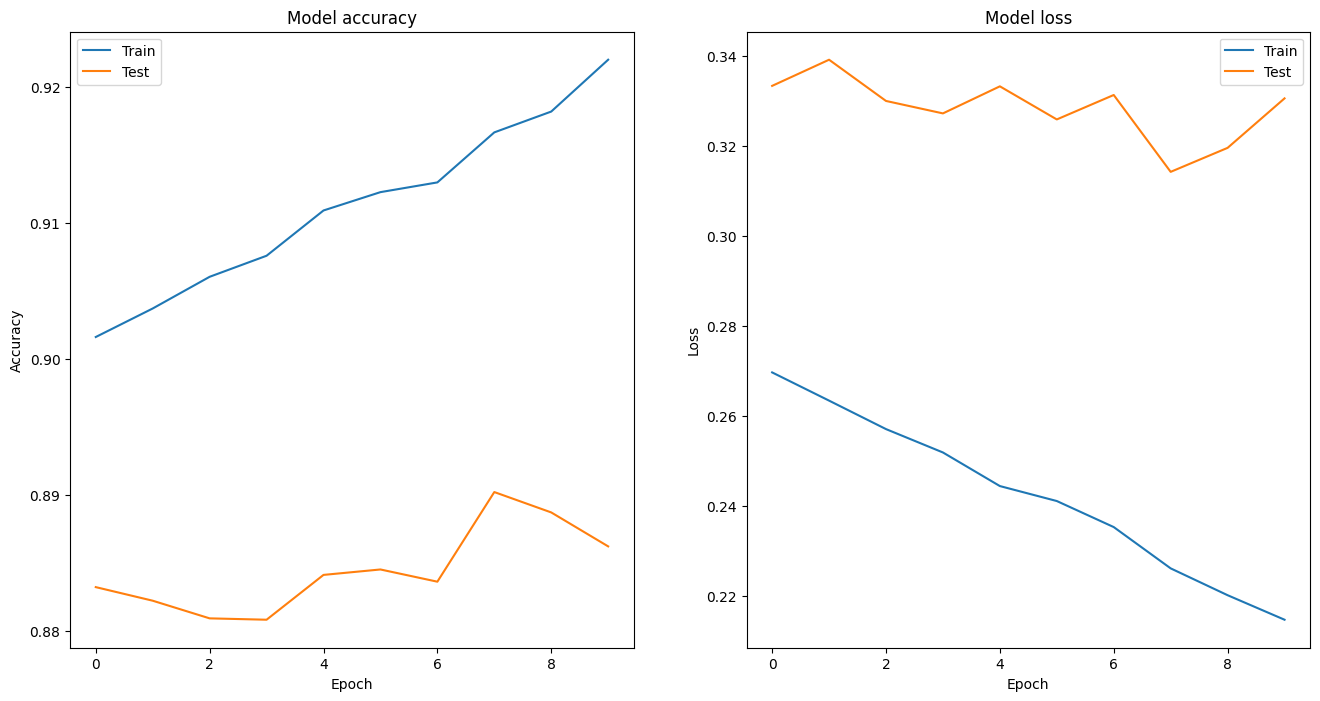

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot training & validation accuracy
axes[0].plot(model_performance.history["accuracy"])
axes[0].plot(model_performance.history["val_accuracy"])
axes[0].set_title("Model accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].legend(["Train", "Test"])

# Plot training & validation loss
axes[1].plot(model_performance.history["loss"])
axes[1].plot(model_performance.history["val_loss"])
axes[1].set_title("Model loss")
axes[1].set_ylabel("Loss")
axes[1].set_xlabel("Epoch")
axes[1].legend(["Train", "Test"])
plt.show()

# Conclusion

**Observations**

* The model has an acccuracy of 87.39% on the test data.
* There is a significant difference in the accuracy and loss on both the training and test data. The model performs better on the training data than the test data thus overfittin may be taking place.
* Increasing the epoch and batch_size increases the accuracy.

**Recommendations**

* Adding more neutrons and increasing the number of hidden layers may increase the accuracy of the model in making predictions.